# 分析美国航班延误

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
%matplotlib inline

# 设置seaborn的参数,和一些全局参数的设置

In [2]:
colors = sns.color_palette("deep")
sns.set_context(rc={'figure.figsize':(15,5)})
pd.set_option('display.max_columns',10)
pd.set_option('display.max_rows',10)

# 导入数据,并查看一些基本数据

In [3]:
data = pd.read_csv('./airport-ontime.csv')

data.info()
data.shape
data.columns
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 502617 entries, 0 to 502616
Data columns (total 17 columns):
FL_DATE                  502617 non-null object
UNIQUE_CARRIER           502617 non-null object
ORIGIN_AIRPORT_ID        502617 non-null int64
ORIGIN_AIRPORT_SEQ_ID    502617 non-null int64
ORIGIN_CITY_MARKET_ID    502617 non-null int64
ORIGIN_STATE_ABR         502617 non-null object
DEST_AIRPORT_ID          502617 non-null int64
DEST_AIRPORT_SEQ_ID      502617 non-null int64
DEST_CITY_MARKET_ID      502617 non-null int64
DEST_STATE_ABR           502617 non-null object
DEP_DELAY_NEW            492974 non-null float64
DEP_DEL15                492974 non-null float64
ARR_DELAY_NEW            490716 non-null float64
ARR_DEL15                490716 non-null float64
DISTANCE                 502617 non-null float64
DISTANCE_GROUP           502617 non-null int64
Unnamed: 16              0 non-null float64
dtypes: float64(6), int64(7), object(4)
memory usage: 65.2+ MB


,FL_DATE,UNIQUE_CARRIER,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN_CITY_MARKET_ID,...,ARR_DELAY_NEW,ARR_DEL15,DISTANCE,DISTANCE_GROUP,Unnamed: 16
0,2014-06-01,AA,12478,1247802,31703,...,0.0,0.0,2475.0,10,NaN
1,2014-06-01,AA,12892,1289203,32575,...,0.0,0.0,2475.0,10,NaN
2,2014-06-01,AA,12478,1247802,31703,...,0.0,0.0,2475.0,10,NaN
3,2014-06-01,AA,12892,1289203,32575,...,160.0,1.0,2475.0,10,NaN
4,2014-06-01,AA,11298,1129803,30194,...,0.0,0.0,3784.0,11,NaN


# 进行数据清洗,去掉一下nan值

In [4]:
# 清洗掉整列都是nan值得情况,并直接进行修改,axis设置为列
data.dropna(how='all',inplace=True,axis=1)
data.head()
data.isnull().sum()

FL_DATE                      0
UNIQUE_CARRIER               0
ORIGIN_AIRPORT_ID            0
ORIGIN_AIRPORT_SEQ_ID        0
ORIGIN_CITY_MARKET_ID        0
                         ...  
DEP_DEL15                 9643
ARR_DELAY_NEW            11901
ARR_DEL15                11901
DISTANCE                     0
DISTANCE_GROUP               0
Length: 16, dtype: int64

# 查看起飞延迟和到达延迟情况，并统计和可视化

In [5]:
data.DEP_DEL15.head()
# 起飞准时率达到了73%左右
data.DEP_DEL15.value_counts()/len(data)

data.ARR_DEL15.head()
# 到达准时率在71%左右
data.ARR_DEL15.value_counts()/len(data)

0.0    0.718261
1.0    0.258061
Name: ARR_DEL15, dtype: float64

In [6]:
# 起飞延迟汇总,以洲名进行分组
by_origin_state = data.groupby('ORIGIN_STATE_ABR')
departure_delay_counts = by_origin_state.DEP_DEL15.sum()
departure_delay_counts.sort_values(ascending=False)

ORIGIN_STATE_ABR
TX    19016.0
CA    15976.0
IL    12174.0
FL     7862.0
GA     7799.0
       ...   
NH       99.0
WV       89.0
VI       46.0
DE       19.0
TT        9.0
Name: DEP_DEL15, Length: 53, dtype: float64

In [7]:
# 到达延迟汇总
by_dest_state=data.groupby('DEST_STATE_ABR')
arrival_delay_counts = by_dest_state.ARR_DEL15.sum()
arrival_delay_counts = arrival_delay_counts.sort_values(ascending=False)
arrival_delay_counts

DEST_STATE_ABR
TX    17849.0
CA    17700.0
IL    11529.0
FL     7537.0
GA     6566.0
       ...   
VT      153.0
WV       99.0
VI       73.0
DE       30.0
TT       13.0
Name: ARR_DEL15, Length: 53, dtype: float64

In [8]:
# 将两个统计出的列表，汇总到一个空的DataFrame对象中
# 不进行转置的话就会是两行多列数据，我们需要的是两列多行的数据
delay_df = pd.DataFrame([departure_delay_counts,arrival_delay_counts]).T
delay_df

,DEP_DEL15,ARR_DEL15
AK,524.0,717.0
AL,641.0,803.0
AR,789.0,866.0
AZ,3939.0,3572.0
CA,15976.0,17700.0
...,...,...
VT,108.0,153.0
WA,2009.0,2412.0
WI,1165.0,1546.0
WV,89.0,99.0


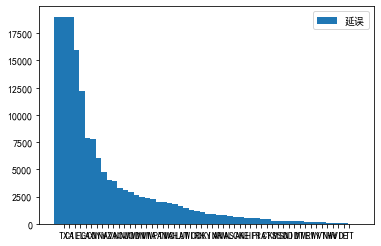

In [67]:
new_df = delay_df.sort_values('DEP_DEL15', ascending=False)
# new_df.plot(kind='bar', title='Number of delayed flights by state')

y = new_df['DEP_DEL15'].tolist()

x = len(tuple(new_df.index.to_list()))

xtick = np.arange(x)

p1 = plt.bar(xtick, height=y, width=3.5, label="延误")

plt.xticks(xtick,tuple(new_df.index.to_list()))
plt.legend()

plt.show()

In [27]:
data.ORIGIN_STATE_ABR.value_counts()

CA    64034
TX    61504
IL    34573
FL    34502
GA    32328
      ...  
VT      472
VI      431
WV      294
DE       76
TT       41
Name: ORIGIN_STATE_ABR, Length: 53, dtype: int64

In [28]:
# 用百分比的方式
pct_departure_delay = departure_delay_counts / data.ORIGIN_STATE_ABR.value_counts()
pct_arrival_delay = arrival_delay_counts / data.DEST_STATE_ABR.value_counts()

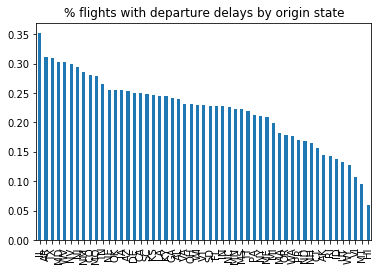

In [29]:
pct_departure_delay.sort_values(ascending=False).plot(kind='bar', title='% flights with departure delays by origin state')

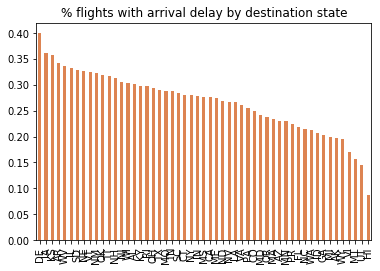

In [30]:
pct_arrival_delay.sort_values(ascending=False).plot(kind='bar', color=colors[1], title='% flights with arrival delay by destination state')

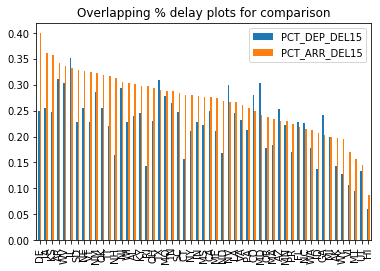

In [31]:
pct_delay_df = pd.DataFrame([pct_departure_delay, pct_arrival_delay], index=['PCT_DEP_DEL15', 'PCT_ARR_DEL15']).T
pct_delay_df.sort_values('PCT_ARR_DEL15', ascending=False).plot(kind='bar', title='Overlapping % delay plots for comparison')

<class 'tuple'>


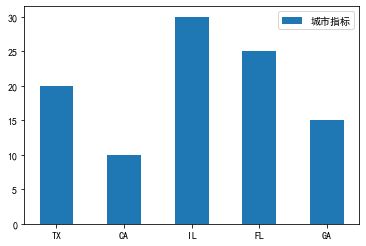

In [59]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

# 将全局的字体设置为黑体
matplotlib.rcParams['font.family'] = 'SimHei'

# 数据
N = 5
y = [20, 10, 30, 25, 15]
x = np.arange(N)
# 添加地名坐标
str1 = ("北京", "上海", "武汉", "深圳", "重庆")
str2 = ('TX', 'CA', 'IL', 'FL', 'GA')
print(type(str2))
# 绘图 x x轴， height 高度, 默认：color="blue", width=0.8
p1 = plt.bar(x, height=y, width=0.5, label="城市指标", tick_label=str2)

# 添加数据标签
# for a, b in zip(x, y):
#     plt.text(a, b + 0.05, '%.0f' % b, ha='center', va='bottom', fontsize=10)

# 添加图例
plt.legend()

# 展示图形
plt.show()